In [1]:
import pandas as pd
import os
import glob
import seaborn as sns
from scipy.stats import entropy
import matplotlib.pyplot as plt
%matplotlib inline
# plt.switch_backend('agg')

In [4]:
folder='/Users/vuh6/Desktop/mount_ros/source/hector_transferChromState/simulation_model_design/experiments/strict_genData/only_ratio_CR_data'
fn_list = glob.glob(folder + '/*.txt')
df_list = list(map(lambda x: pd.read_csv(x, header = 0, index_col = None, sep = '\t'), fn_list))
df = pd.concat(df_list)

In [5]:
df

,model,num_signals,num_references,num_states,hidden,dropout,ratio_m_CR,ratio_r_CR
0,SigOnly,3,18,3,32,0.2,0.847667,0.0
1,SigBeta,3,18,3,32,0.2,0.985800,0.0
2,SigRef,3,18,3,32,0.2,0.864567,1.0
3,SigRefBeta,3,18,3,32,0.2,0.999967,1.0
0,SigOnly,3,33,8,32,0.2,0.894967,0.0
...,...,...,...,...,...,...,...,...
3,SigRefBeta,3,43,3,32,0.2,0.999300,1.0
0,SigOnly,3,13,8,32,0.2,0.774800,0.0
1,SigBeta,3,13,8,32,0.2,0.998267,0.0
2,SigRef,3,13,8,32,0.2,0.783233,1.0


<AxesSubplot:xlabel='num_states', ylabel='ratio_m_CR'>

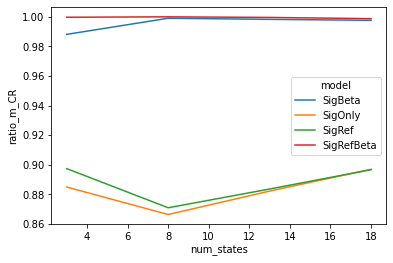

In [6]:
t1 = df.groupby(['model', 'num_states'])['ratio_m_CR'].mean().reset_index()
sns.lineplot(data = t1, x = 'num_states', y = 'ratio_m_CR', hue = 'model')

<AxesSubplot:xlabel='num_references', ylabel='ratio_m_CR'>

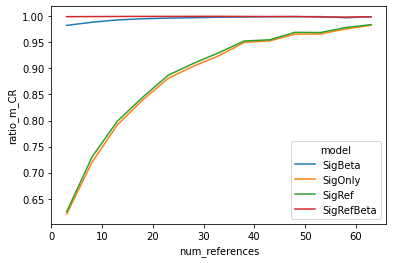

In [6]:
t2 = df.groupby(['model', 'num_references'])['ratio_m_CR'].mean().reset_index()
sns.lineplot(data = t2, x = 'num_references', y = 'ratio_m_CR', hue = 'model')

## Why does the latent space appear uniform right now?

- Because the autoencoder ended up learning to maximize the likelihood of observed data, and not taking into 
account minimizing the difference between the prior of $z$ ($p(z)$) and the variational of $z$ ($q(z|x)$)
- For each reference epigenome, generate data such that there are variations across states. (1/2 positions from state0, other half state1. Each state has one signal patterns. --> in that case, the model may not work if it cannot recognize that it needs a latent variable. 

## Checking the effects of dimension of input data into the latent space representation
A brief reading: http://ruishu.io/2017/01/14/one-bit/
In this section, we will test how changing the number of signal tracks, and the number of reference epigenomes, can change the distribution of posterior probabilities of state assignments

In [24]:
# the 4 models have been run on rosalind given different settings of num_signals, num_references, etc.
output_folder = '/Users/vuh6/Desktop/mount_ros/source/hector_transferChromState/simulation_model_design/experiments/strict_genData_circularState'
small_folder=os.path.join(output_folder,'b10000_r20_m3_s13')
truth_fn = os.path.join(small_folder,'collapsed_theta.txt.gz')
sigOnly_fn = os.path.join(small_folder, 'SigOnly_pos.txt.gz')
sigBeta_fn = os.path.join(small_folder, 'SigBeta_pos.txt.gz')
sigRefBeta_fn = os.path.join(small_folder, 'SigRefBeta_pos.txt.gz')
sigRef_fn = os.path.join(small_folder, 'SigRef_pos.txt.gz')

In [25]:
def read_state_df(fn, model_name):
    df = pd.read_csv(fn, header = 0, index_col = None, sep = '\t')
    df['entropy'] = df.apply(lambda x: entropy(x[:-1]), axis = 1)
    df.columns = list(map(lambda x: '{}|{}'.format(model_name, x), df.columns))
    return df
truth_df = read_state_df(truth_fn, 'truth')
sigOnly_df = read_state_df(sigOnly_fn, 'sigOnly')
sigBeta_df = read_state_df(sigBeta_fn, 'sigBeta')
sigRefBeta_df = read_state_df(sigRefBeta_fn, 'sigRefBeta')
sigRef_df = read_state_df(sigRef_fn, 'sigRef')
all_df = pd.concat([truth_df, sigOnly_df, sigBeta_df, sigRefBeta_df, sigRef_df], axis = 1)

In [26]:
all_df.head(30)

,truth|0,truth|1,truth|2,truth|3,truth|4,truth|5,truth|6,truth|7,truth|8,truth|9,...,sigRef|5,sigRef|6,sigRef|7,sigRef|8,sigRef|9,sigRef|10,sigRef|11,sigRef|12,sigRef|max_state,sigRef|entropy
0,0.981826,0.000000,0.000000,0.000000,0.001205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.056565,0.056608,0.057161,0.053616,0.155426,0.059873,0.114953,0.202190,12,2.400760
1,0.023928,0.969926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035304,0.038401,0.040978,0.040428,0.035559,0.039032,0.007353,0.598632,12,1.640265
2,0.008344,0.014350,0.977306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.046602,0.048605,0.049242,0.048421,0.055243,0.048736,0.204287,0.206077,12,2.353546
3,0.000000,0.008092,0.008784,0.983124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.077841,0.089680,0.095206,0.095527,0.113197,0.084595,0.010473,0.019161,9,2.471434
4,0.000000,0.000000,0.010415,0.008880,0.980705,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030880,0.032329,0.029773,0.030953,0.023851,0.031462,0.675154,0.010428,11,1.423335
5,0.000000,0.000000,0.000000,0.006851,0.007659,0.985490,0.000000,0.000000,0.000000,0.000000,...,0.042829,0.041412,0.041676,0.041532,0.172420,0.042205,0.368684,0.062245,11,2.118695
6,0.000000,0.000000,0.000000,0.000000,0.015260,0.003980,0.980760,0.000000,0.000000,0.000000,...,0.062357,0.065873,0.063421,0.064340,0.183092,0.055867,0.039400,0.023753,2,2.406908
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.013026,0.019500,0.967474,0.000000,0.000000,...,0.036955,0.031788,0.034008,0.036748,0.593873,0.033269,0.028281,0.023252,9,1.681018
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004580,0.008201,0.987219,0.000000,...,0.022171,0.022311,0.024731,0.022372,0.007758,0.022055,0.033823,0.063471,2,1.360584
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005527,0.015420,0.979053,...,0.057079,0.059549,0.059913,0.057509,0.194780,0.054342,0.140647,0.064044,9,2.454955


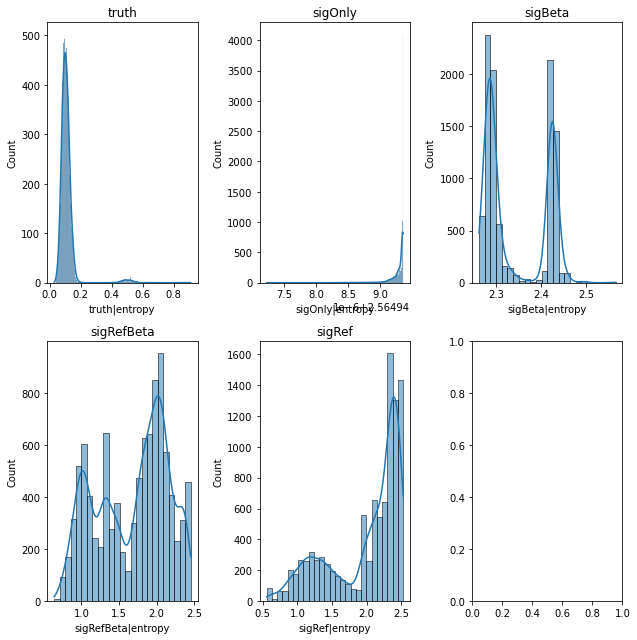

In [27]:
# draw the histogram of entropy for the different models
model_name_list = ['truth', 'sigOnly', 'sigBeta', 'sigRefBeta', 'sigRef']
plot_nrow = 2
plot_ncol = 3
fig, axes = plt.subplots(ncols = plot_ncol, nrows = plot_nrow, figsize = (9,9))
for model_index, model_name in enumerate(model_name_list):
    ax = (axes.flat)[model_index] 
    sns.histplot(all_df['{}|entropy'.format(model_name)], kde= True, ax = ax).set_title(model_name)
fig.tight_layout()
plt.show()

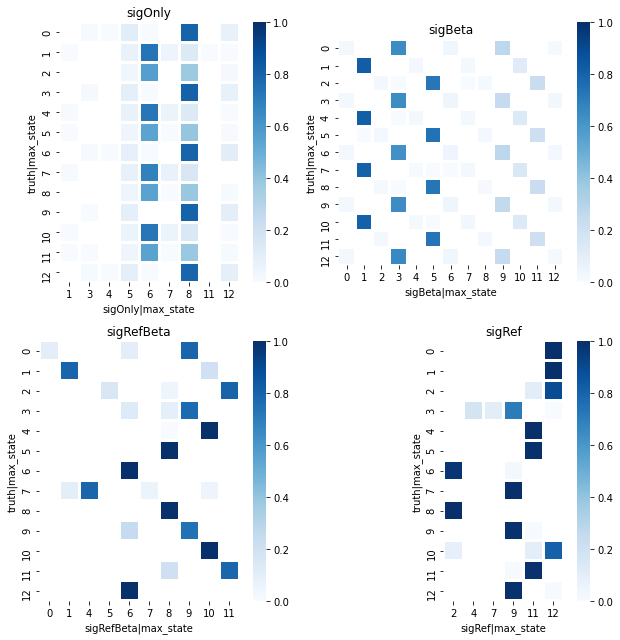

In [28]:
# draw the confusion matrix
state_df = all_df.filter(regex='max_state$',axis=1)
# select columns ending with 'max_state'
plot_nrow = 2
plot_ncol = 2
fig, axes = plt.subplots(ncols = plot_ncol, nrows = plot_nrow, figsize = (9,9))
for model_index, model_name in enumerate(model_name_list[1:]):
    colnames = ['truth|max_state', '{}|max_state'.format(model_name)]
    df = state_df[colnames]
    df = df.groupby(colnames).size().to_frame(name = 'size').reset_index()
    df = df.pivot(colnames[0], colnames[1], 'size')
    df = df.div(df.sum(axis = 1), axis = 0) # row normalize
    ax = (axes.flat)[model_index] 
    sns.heatmap(df, cbar=True, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues', ax=ax).set_title(model_name)
fig.tight_layout()
plt.show()

In [10]:
df = state_df.groupby(['truth|max_state', 'sigOnly|max_state']).size().to_frame(name='size').reset_index()

In [23]:
t = df.pivot('truth|max_state', 'sigOnly|max_state', 'size')
t = t.div(t.sum(axis = 1), axis = 0)
t

sigOnly|max_state,0,1,2
truth|max_state,,,
0,0.802030,0.037026,0.160944
1,0.811282,0.038393,0.150325
2,0.800000,0.032159,0.167841


<AxesSubplot:xlabel='sigOnly|max_state', ylabel='truth|max_state'>

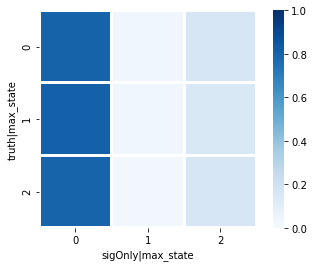

In [25]:

for model_index, model_name in enumerate(model_name_list[1:]):
    df = state_df.groupby(['truth|max_state', '{}|max'])
sns.heatmap(t, cbar=True, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')

In [41]:
state_df

,truth|max_state,sigOnly|max_state,sigBeta|max_state,sigRefBeta|max_state,sigRef|max_state
0,0,0,0,0,1
1,2,0,2,2,0
2,1,0,1,1,0
3,2,0,2,2,0
4,1,0,1,1,1
